# Trabalho Final - Aprendizado de Maquina (Parte 02)

IFMG - Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Especialização em Inteligência Artificial  

Mat.: Aprendizado de Máquina 

Prof.: Frederico Gadelha Guimarães

Aluno: Christhian da S. Gonçalves 

## 01 - Base de Dados

Conjunto de dados 02: 
É fornecido um conjunto de dados para a previsão de falências relacionadas a empresas americanas listadas na Bolsa de Valores de Nova York e NASDAQ. O conjunto de dados compreende dados contábeis de 8.262 empresas distintas registradas durante o período de 1999 a 2018.

Link: https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset?resource=download

Descrição do Nome da Variáve

- X1 Ativos circulantes - Todos os ativos de uma empresa que devem ser vendidos ou usados como resultado de operações comerciais padrão no próximo ano
- X2 Custo dos produtos vendidos - O valor total que uma empresa pagou como custo diretamente relacionado à venda de produtos
- X3 Depreciação e amortização - A depreciação refere-se à perda de valor de um ativo fixo tangível ao longo
tempo (como propriedade, maquinário, prédios e instalações). A amortização refere-se à perda de valor dos ativos intangíveis ao longo do tempo.
- X4 EBITDA - Lucro antes de juros, impostos, depreciação e amortização. É uma medida do desempenho financeiro geral de uma empresa, servindo como alternativa ao lucro líquido.
- X5 Inventário - A contabilidade de itens e matérias-primas que uma empresa usa na produção ou vende.
- X6 Lucro Líquido - A lucratividade geral de uma empresa depois que todas as despesas e custos foram deduzidos da receita total.
- X7 Total de contas a receber - O saldo de dinheiro devido a uma empresa por bens ou serviços entregues ou usados, mas ainda não pagos pelos clientes.
- X8 Valor de mercado - O preço de um ativo em um mercado. Neste conjunto de dados, refere-se à capitalização de mercado, uma vez que as empresas são negociadas publicamente no mercado de ações.
- X9 Vendas líquidas - A soma das vendas brutas de uma empresa menos seus retornos, abatimentos e descontos.
- X10 Total de ativos - Todos os ativos, ou itens de valor, que uma empresa possui.
- X11 Total Dívida de longo prazo - Empréstimos e outros passivos de uma empresa que não vencerão dentro de um ano da data do balanço.
- X12 EBIT - Lucro antes de juros e impostos.
- X13 Lucro Bruto - O lucro que uma empresa obtém depois de subtrair todos os custos relacionados à fabricação e venda de seus produtos ou serviços.
- X14 Passivo circulante total - A soma das contas a pagar, passivos acumulados e impostos, como títulos a pagar no final do ano, salários e comissões restantes.
- X15 Lucros Retidos - A quantidade de lucro que uma empresa sobrou depois de pagar todos os seus custos diretos, custos indiretos, imposto de renda e seus dividendos aos acionistas.
- X16 Total Revenue - A quantidade de receita que uma empresa obteve de todas as vendas antes de subtrair as despesas. Pode incluir juros e dividendos de investimentos.
- X17 Passivos totais - As dívidas e obrigações combinadas que a empresa deve a terceiros.
- X18 Despesas Operacionais Totais - As despesas incorridas por uma empresa por meio de suas operações comerciais normais.

### 2.1 Importando bibliotecas

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

### 2.2 Carregando base de dados

In [3]:
df_falencia = pd.read_csv('https://raw.githubusercontent.com/christhiangoncalves/Machine_Learning_Pipeline/main/american_bankruptcy.csv')
df_falencia

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


### 2.3 Análise dos dados e pré-processamento

In [4]:
#Informações do dataframe
display(df_falencia.info(), 'Verifica valores Nulos',df_falencia.isna().mean(),'Descrição estatística dos dados',df_falencia.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

None

'Verifica valores Nulos'

company_name    0.0
status_label    0.0
year            0.0
X1              0.0
X2              0.0
X3              0.0
X4              0.0
X5              0.0
X6              0.0
X7              0.0
X8              0.0
X9              0.0
X10             0.0
X11             0.0
X12             0.0
X13             0.0
X14             0.0
X15             0.0
X16             0.0
X17             0.0
X18             0.0
dtype: float64

'Descrição estatística dos dados'

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [5]:
#Verificando linhas duplicados
df_falencia.duplicated().sum()

0

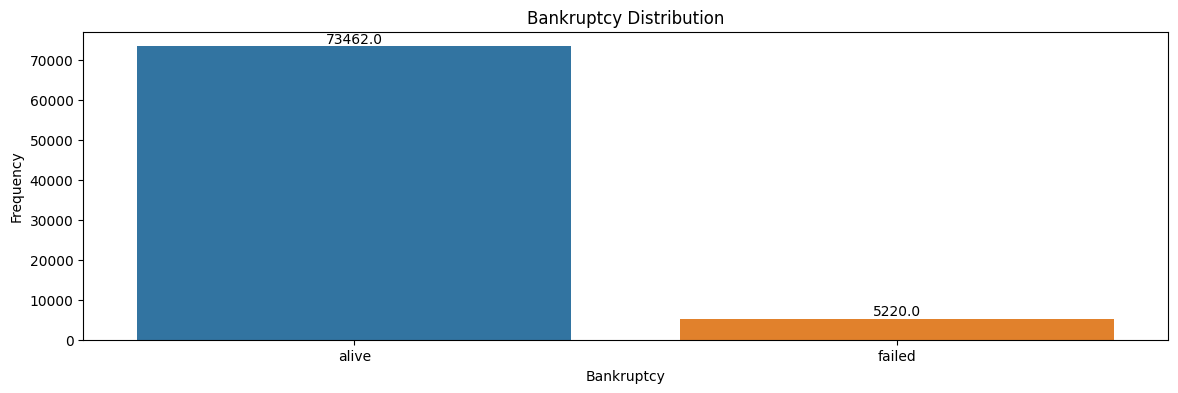

In [8]:
# Criando gráfico de 'Machine failure description Distribution'
plt.figure(figsize=(14,4))
sns.countplot(x='status_label', data = df_falencia)
plt.xlabel('Bankruptcy')
plt.ylabel('Frequency')
plt.title('Bankruptcy Distribution')

plt.xticks(rotation=0)

#Adicionando rotulo de dados no gráfico
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

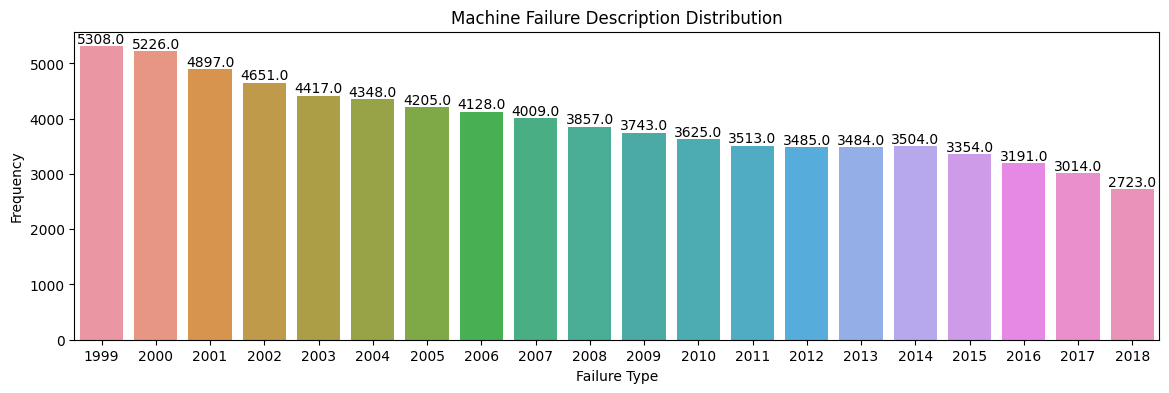

In [7]:
# Criando gráfico de 'Machine failure description Distribution'
plt.figure(figsize=(14,4))
sns.countplot(x='year', data = df_falencia)
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.title('Machine Failure Description Distribution')

plt.xticks(rotation=0)

#Adicionando rotulo de dados no gráfico
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [11]:
le = LabelEncoder()
df_falencia["Failed_encoder"] = le.fit_transform(df_falencia['status_label'])
print(df_falencia.groupby(['status_label','Failed_encoder']).size().reset_index().drop(columns=0))


  status_label  Failed_encoder
0        alive               0
1       failed               1


In [12]:
df_falencia = df_falencia.drop(['status_label', 'company_name'], axis=1)

In [13]:
df_falencia.columns

Index(['year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'Failed_encoder'],
      dtype='object')

In [14]:
plot1 = ['Failed_encoder','X1', 'X2', 'X3', 'X4']
plot2 = ['Failed_encoder', 'X5', 'X6', 'X7', 'X8']
plot3 = ['Failed_encoder', 'X9', 'X10', 'X11', 'X12']
plot4 = ['Failed_encoder', 'X13', 'X14', 'X15', 'X16']
plot5 = [ 'Failed_encoder', 'year','X17', 'X18']

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


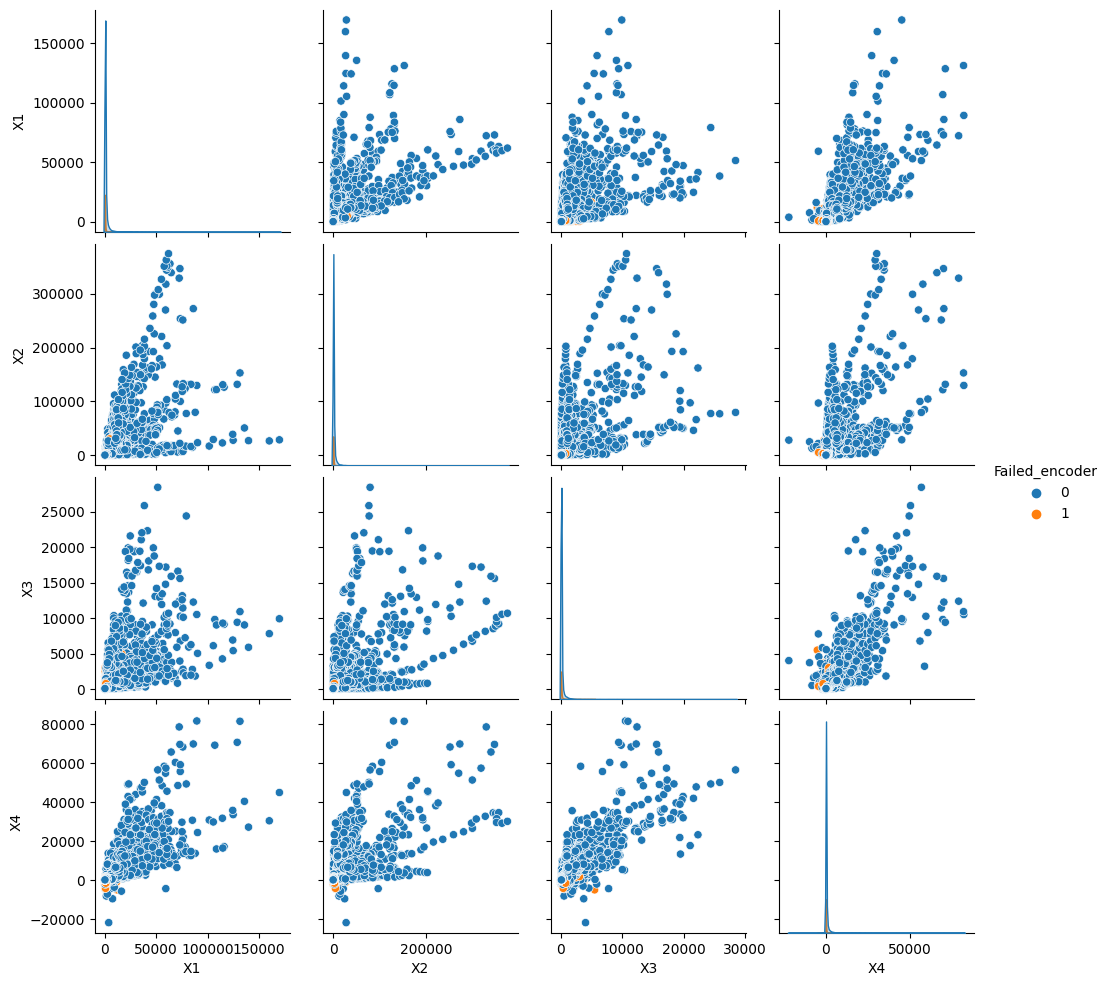

In [15]:
sns.pairplot(df_falencia[plot1], hue= 'Failed_encoder')

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


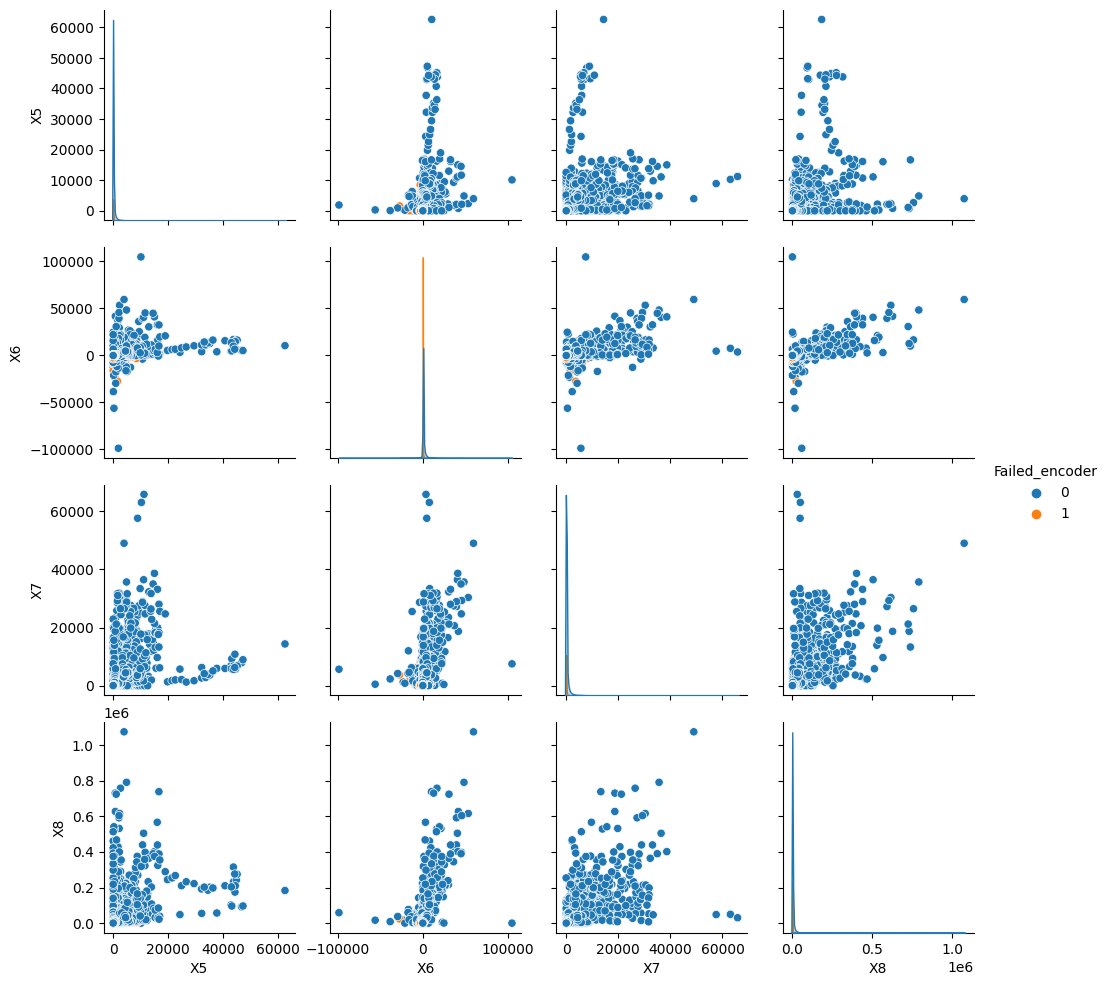

In [16]:
sns.pairplot(df_falencia[plot2], hue= 'Failed_encoder')

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


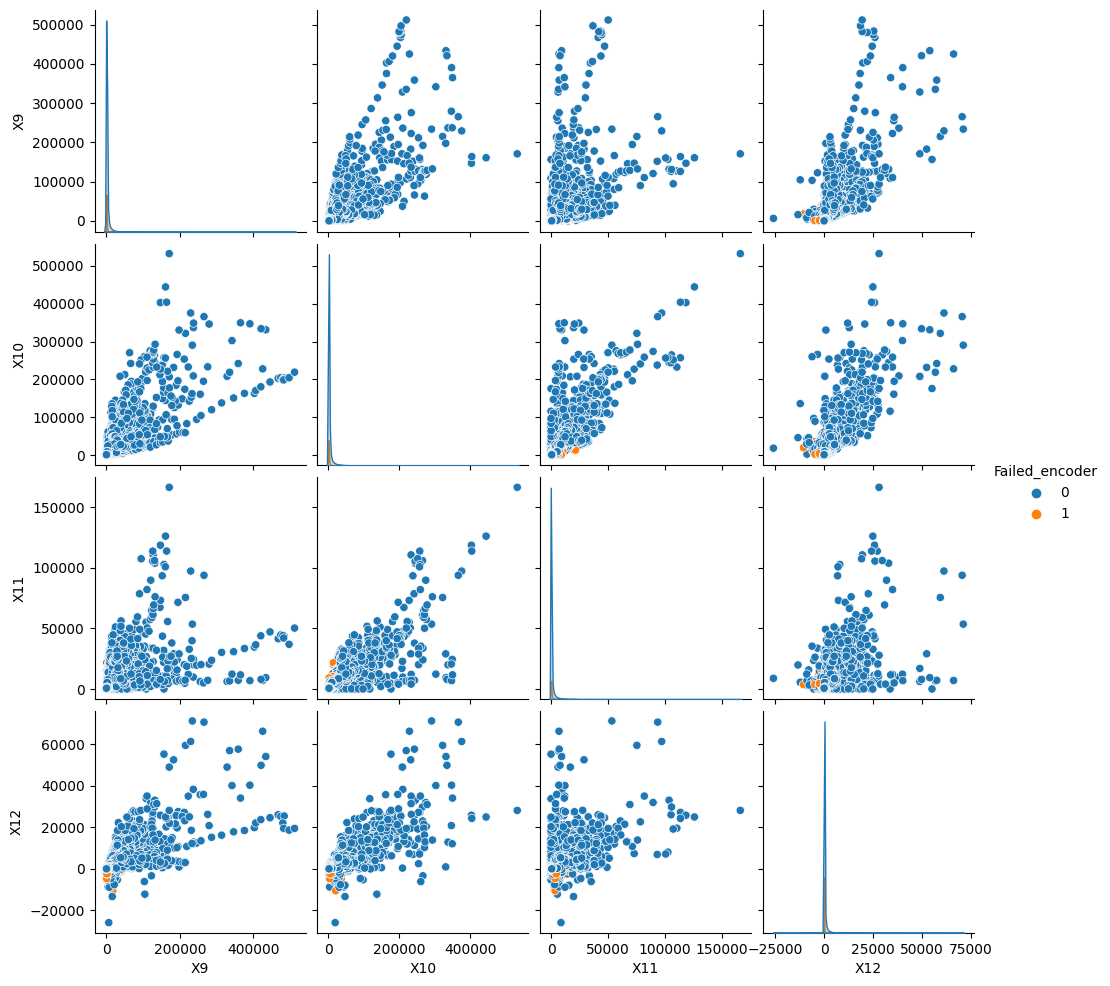

In [17]:
sns.pairplot(df_falencia[plot3], hue= 'Failed_encoder')

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


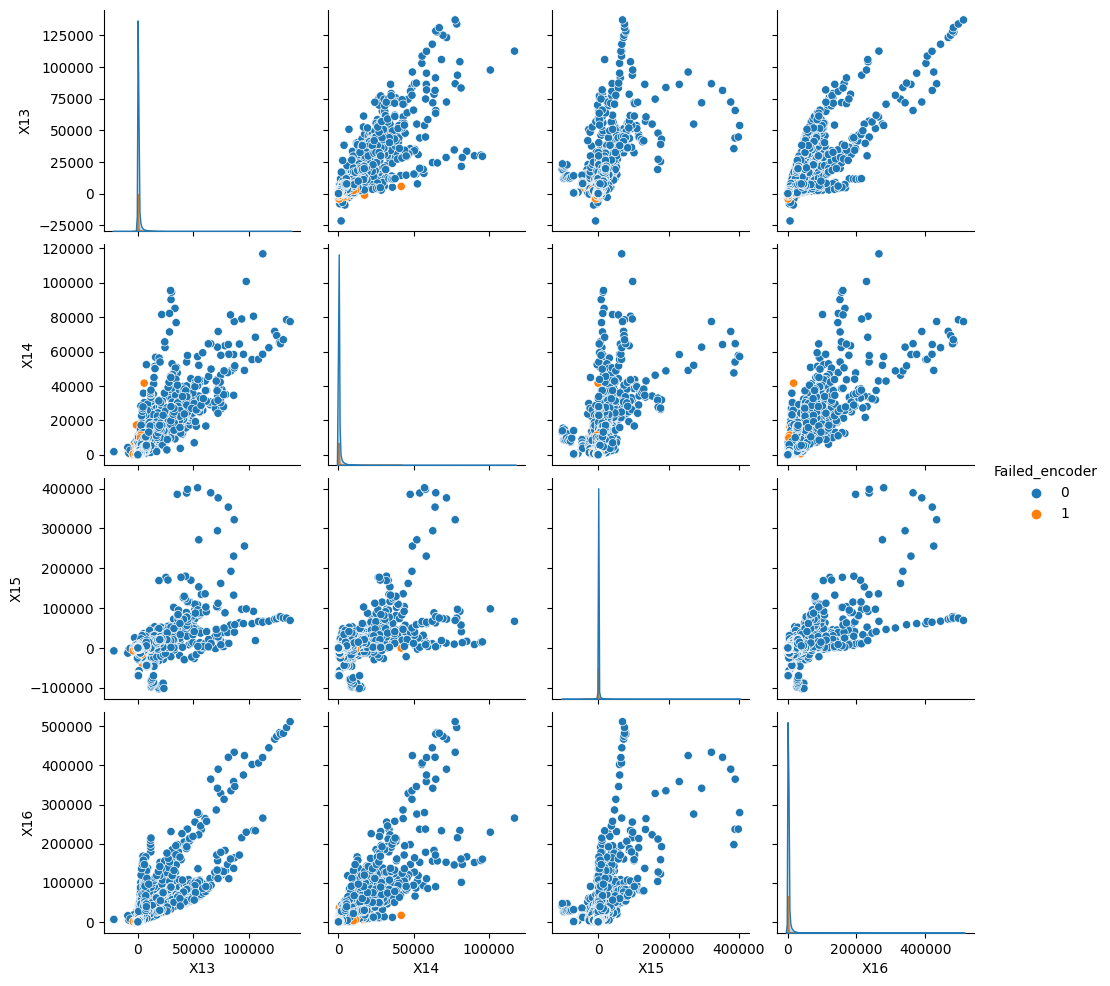

In [18]:
sns.pairplot(df_falencia[plot4], hue= 'Failed_encoder')

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


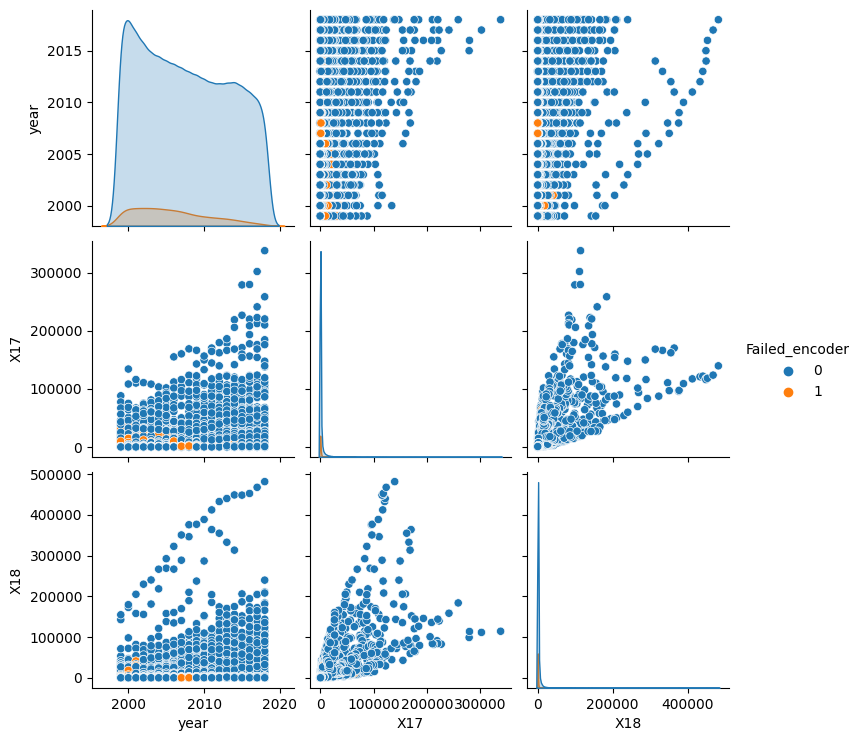

In [19]:
sns.pairplot(df_falencia[plot5], hue= 'Failed_encoder')

Text(0.5, 1.0, 'Correlation Heatmap')

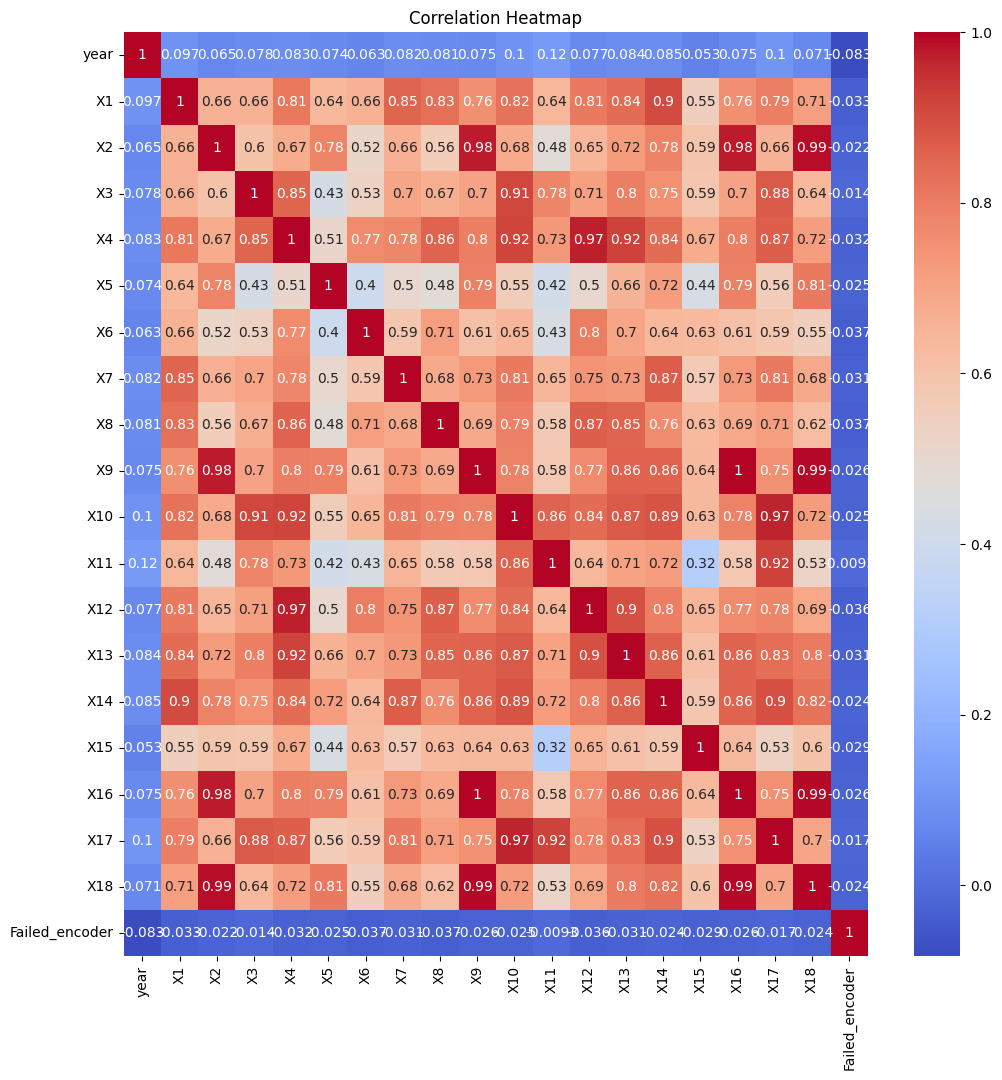

In [21]:
#Mapa de Correlação
#df_falencia = df_falencia.drop(['year'],axis=1)

plt.figure(figsize=(12,12))
sns.heatmap(df_falencia.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

# 03 - Pipeline e Modelos de Machile Learning

##### K-NN - K-Nearest Neighbors

O K-Nearest Neighbors (K-NN) é um algoritmo de aprendizado de máquina supervisionado utilizado tanto para classificação quanto para regressão. Não envolve nenhum modelo matemático complexo, mas se baseia no princípio de similaridade entre os dados. 

O K-NN é um algoritmo de aprendizado baseado em instância, o que significa que ele se baseia na proximidade dos dados de treinamento para fazer previsões sobre novos dados.

A normalização garante que todos dos dados estejam na mesma escala, evitando que dados com valores maiores dominem as distâncias e influenciem de forma desproporcional o algoritmo.

##### Naive Bayes

O Naive Bayes é um algoritmo de aprendizado de máquina supervisionado que se baseia no Teorema de Bayes que descreve como calcular a probabilidade condicional de um evento 'A' ocorrer, dado que um evento 'B' ocorreu. Na classificação, o Teorema de Bayes é usado para calcular a probabilidade de cada classe para um novo dado, dado as features observadas desse dado. É baseado também na suposição "ingênua" (naive) de independência condicional entre as features do conjunto de dados. Isso significa que o valor de uma feature não é influenciado pelo valor de outra feature, uma vez que a classe é conhecida. Essa suposição simplifica os cálculos das probabilidades condicionais durante o treinamento e classificação.

O Naive Bayes não exige explicitamente a normalização dos dados por não ser sensível à escala dos dados, devido à suposição "ingênua" de independência condicional. 

O Naive Bayes é adequado para lidar com dados categóricos ou discretos, como texto, contagens de palavras, atributos binários e outras features discretas. Existem diferentes variantes do Naive Bayes, como o Naive Bayes Gaussiano (usado para features contínuas que seguem uma distribuição normal) e o Naive Bayes Multinomial (usado para features discretas).

Para aplicar o Naive Bayes em dados numéricos, é necessário usar uma variante específica do algoritmo, chamada de Naive Bayes Gaussiano (Gaussian Naive Bayes) que é projetado para lidar com features contínuas, ou seja, dados numéricos que podem assumir um número infinito de valores dentro de um intervalo específico.

##### Árvore de Decisão

A Árvore de Decisão é um algoritmo de aprendizado de máquina supervisionado que é usado para tarefas de classificação e regressão. A árvore de decisão cria uma estrutura de árvore que representa um conjunto de regras de decisão hierárquicas e não lineares, onde cada nó interno representa uma decisão baseada em um atributo (feature) e cada folha representa o resultado (classe ou valor) da decisão.

A árvore de decisão é construída recursivamente dividindo o conjunto de dados em subconjuntos menores com base em atributos que melhor separam as classes. Cada divisão é escolhida com base em critérios de impureza, como o índice Gini (para classificação) ou o erro quadrático médio (para regressão). O processo de divisão continua até que uma condição de parada seja atingida, como profundidade máxima da árvore, número mínimo de amostras por folha ou critérios de impureza atingindo um limite pré-definido.

Quando a Árvore de Decisão é construída, ela escolhe os atributos e os valores de divisão que melhor separam as classes dos dados de treinamento, independentemente da escala dos valores das features. Assim, é desnecessário normalizar ou padronizar os dados antes de aplicar a Árvore de Decisão.

Além disso, a Árvore de Decisão é capaz de lidar com dados categóricos e numéricos diretamente, sem a necessidade de codificação de variáveis categóricas em valores numéricos, tornando-a ainda mais conveniente para trabalhar com diferentes tipos de dados.

#### 3.1.1 Comparação dos modelos

In [63]:
# Separar os dados em features (X) e target (y)
X = df_falencia.drop(columns=['Failed_encoder'])
y = df_falencia['Failed_encoder']

X_np = X.values
y_np = y.values

# Criar os objetos dos modelos que você deseja avaliar
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
smk = SMOTETomek(random_state=42)
num_splits = 5
# Criar o objeto TimeSeriesSplit para realizar a separação temporal dos dados
tscv = TimeSeriesSplit(n_splits=num_splits)

# Inicializar listas para armazenar as métricas de avaliação em cada split
knn_accuracy_scores = []
knn_precision_scores = []
knn_recall_scores = []
knn_f1_scores = []

nb_accuracy_scores = []
nb_precision_scores = []
nb_recall_scores = []
nb_f1_scores = []

dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
dt_f1_scores = []

In [65]:
# Realizar o Time Series Split e treinar/testar os modelos em cada split
for train_index, test_index in tscv.split(X_np):
    
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    
    X_train, y_train = smk.fit_resample(X_train, y_train)
 
    # Treinar e fazer previsões com o modelo K-NN
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    knn_precision = precision_score(y_test, y_pred_knn)
    knn_recall = recall_score(y_test, y_pred_knn)
    knn_f1 = f1_score(y_test, y_pred_knn)
    
    knn_accuracy_scores.append(knn_accuracy)
    knn_precision_scores.append(knn_precision)
    knn_recall_scores.append(knn_recall)
    knn_f1_scores.append(knn_f1)
    
    # Treinar e fazer previsões com o modelo Naive Bayes
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    
    nb_accuracy = accuracy_score(y_test, y_pred_nb)
    nb_precision = precision_score(y_test, y_pred_nb)
    nb_recall = recall_score(y_test, y_pred_nb)
    nb_f1 = f1_score(y_test, y_pred_nb)
    
    nb_accuracy_scores.append(nb_accuracy)
    nb_precision_scores.append(nb_precision)
    nb_recall_scores.append(nb_recall)
    nb_f1_scores.append(nb_f1)
    
    # Treinar e fazer previsões com o modelo Árvore de Decisão
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    
    dt_accuracy = accuracy_score(y_test, y_pred_dt)
    dt_precision = precision_score(y_test, y_pred_dt)
    dt_recall = recall_score(y_test, y_pred_dt)
    dt_f1 = f1_score(y_test, y_pred_dt)
    
    dt_accuracy_scores.append(dt_accuracy)
    dt_precision_scores.append(dt_precision)
    dt_recall_scores.append(dt_recall)
    dt_f1_scores.append(dt_f1)

In [66]:
# Imprimir as métricas de avaliação para cada modelo em cada split
for i in range(num_splits):
    print(f"K-NN - Split {i+1}:")
    print(f"Acurácia: {knn_accuracy_scores[i]}")
    print(f"Precision: {knn_precision_scores[i]}")
    print(f"Recall: {knn_recall_scores[i]}")
    print(f"F1 Score: {knn_f1_scores[i]}")
    print()

    print(f"Naive Bayes - Split {i+1}:")
    print(f"Acurácia: {nb_accuracy_scores[i]}")
    print(f"Precision: {nb_precision_scores[i]}")
    print(f"Recall: {nb_recall_scores[i]}")
    print(f"F1 Score: {nb_f1_scores[i]}")
    print()

    print(f"Árvore de Decisão - Split {i+1}:")
    print(f"Acurácia: {dt_accuracy_scores[i]}")
    print(f"Precision: {dt_precision_scores[i]}")
    print(f"Recall: {dt_recall_scores[i]}")
    print(f"F1 Score: {dt_f1_scores[i]}")
    print()



K-NN - Split 1:
Acurácia: 0.7964615267292
Precision: 0.10255241567912489
Recall: 0.24324324324324326
F1 Score: 0.14427701186277656

Naive Bayes - Split 1:
Acurácia: 0.16540837336993822
Precision: 0.07376839955755977
Recall: 0.9372972972972973
F1 Score: 0.13677236157122574

Árvore de Decisão - Split 1:
Acurácia: 0.8528178143826737
Precision: 0.1329437545653762
Recall: 0.19675675675675675
F1 Score: 0.15867480383609414

K-NN - Split 2:
Acurácia: 0.7448333714634332
Precision: 0.09381044487427466
Recall: 0.3523002421307506
F1 Score: 0.14816700610997965

Naive Bayes - Split 2:
Acurácia: 0.09540150995195608
Precision: 0.06434549186799306
Recall: 0.986682808716707
F1 Score: 0.12081233323450935

Árvore de Decisão - Split 2:
Acurácia: 0.8583848089681995
Precision: 0.13722730471498945
Recall: 0.2360774818401937
F1 Score: 0.17356475300400534

K-NN - Split 3:
Acurácia: 0.7360634484862351
Precision: 0.09940975458216837
Recall: 0.36281179138321995
F1 Score: 0.15605949768349184

Naive Bayes - Split 3:

In [67]:
# Imprimir a média e desvio padrão de cada métrica no Time Series Split
print("Média e Desvio Padrão para K-NN:")
print("Acurácia:", np.mean(knn_accuracy_scores), np.std(knn_accuracy_scores))
print("Precision:", np.mean(knn_precision_scores), np.std(knn_precision_scores))
print("Recall:", np.mean(knn_recall_scores), np.std(knn_recall_scores))
print("F1 Score:", np.mean(knn_f1_scores), np.std(knn_f1_scores))
print()

print("Média e Desvio Padrão para Naive Bayes:")
print("Acurácia:", np.mean(nb_accuracy_scores), np.std(nb_accuracy_scores))
print("Precision:", np.mean(nb_precision_scores), np.std(nb_precision_scores))
print("Recall:", np.mean(nb_recall_scores), np.std(nb_recall_scores))
print("F1 Score:", np.mean(nb_f1_scores), np.std(nb_f1_scores))
print()

print("Média e Desvio Padrão para Árvore de Decisão:")
print("Acurácia:", np.mean(dt_accuracy_scores), np.std(dt_accuracy_scores))
print("Precision:", np.mean(dt_precision_scores), np.std(dt_precision_scores))
print("Recall:", np.mean(dt_recall_scores), np.std(dt_recall_scores))
print("F1 Score:", np.mean(dt_f1_scores), np.std(dt_f1_scores))



Média e Desvio Padrão para K-NN:
Acurácia: 0.7528254404026538 0.023918457003063463
Precision: 0.09981129162325551 0.008032649894048992
Recall: 0.3323754569228964 0.05110778200082745
F1 Score: 0.1527855481309882 0.0126361872606473

Média e Desvio Padrão para Naive Bayes:
Acurácia: 0.10958590711507665 0.028261128737826453
Precision: 0.06858714605168419 0.0031169495728139243
Recall: 0.9694300219391963 0.02004622706648735
F1 Score: 0.128078427419697 0.005279492708204238

Média e Desvio Padrão para Árvore de Decisão:
Acurácia: 0.8556089376954168 0.010433175744327058
Precision: 0.12917582374415484 0.018867675154081734
Recall: 0.19722571908016073 0.026432645234187473
F1 Score: 0.15572074217585544 0.02037613214006881


In [69]:
# Cálculo das métricas médias e desvios padrão para K-NN
knn_metrics = {
    'Modelo': 'K-NN',
    'Acurácia': round(np.mean(knn_accuracy_scores), 3),
    'Precision': round(np.mean(knn_precision_scores), 3),
    'Recall': round(np.mean(knn_recall_scores), 3),
    'F1 Score': round(np.mean(knn_f1_scores), 3),
    'Desvio Padrão Acurácia': round(np.std(knn_accuracy_scores), 3),
    'Desvio Padrão Precision': round(np.std(knn_precision_scores), 3),
    'Desvio Padrão Recall': round(np.std(knn_recall_scores), 3),
    'Desvio Padrão F1 Score': round(np.std(knn_f1_scores), 3)
}

# Cálculo das métricas médias e desvios padrão para Naive Bayes
nb_metrics = {
    'Modelo': 'Naive Bayes',
    'Acurácia': round(np.mean(nb_accuracy_scores), 3),
    'Precision': round(np.mean(nb_precision_scores), 3),
    'Recall': round(np.mean(nb_recall_scores), 3),
    'F1 Score': round(np.mean(nb_f1_scores), 3),
    'Desvio Padrão Acurácia': round(np.std(nb_accuracy_scores), 3),
    'Desvio Padrão Precision': round(np.std(nb_precision_scores), 3),
    'Desvio Padrão Recall': round(np.std(nb_recall_scores), 3),
    'Desvio Padrão F1 Score': round(np.std(nb_f1_scores), 3)
}

# Cálculo das métricas médias e desvios padrão para Árvore de Decisão
dt_metrics = {
    'Modelo': 'Árvore de Decisão',
    'Acurácia': round(np.mean(dt_accuracy_scores), 3),
    'Precision': round(np.mean(dt_precision_scores), 3),
    'Recall': round(np.mean(dt_recall_scores), 3),
    'F1 Score': round(np.mean(dt_f1_scores), 3),
    'Desvio Padrão Acurácia': round(np.std(dt_accuracy_scores), 3),
    'Desvio Padrão Precision': round(np.std(dt_precision_scores), 3),
    'Desvio Padrão Recall': round(np.std(dt_recall_scores), 3),
    'Desvio Padrão F1 Score': round(np.std(dt_f1_scores), 3)
}



In [70]:
# Criar dataframes para cada modelo
df_metrics = pd.DataFrame([knn_metrics, nb_metrics, dt_metrics])

# Exibir a tabela com os resultados arredondados para 3 casas decimais
df_metrics.round(3)
print(df_metrics)

              Modelo  Acurácia  Precision  Recall  F1 Score  \
0               K-NN     0.753      0.100   0.332     0.153   
1        Naive Bayes     0.110      0.069   0.969     0.128   
2  Árvore de Decisão     0.856      0.129   0.197     0.156   

   Desvio Padrão Acurácia  Desvio Padrão Precision  Desvio Padrão Recall  \
0                   0.024                    0.008                 0.051   
1                   0.028                    0.003                 0.020   
2                   0.010                    0.019                 0.026   

   Desvio Padrão F1 Score  
0                   0.013  
1                   0.005  
2                   0.020  


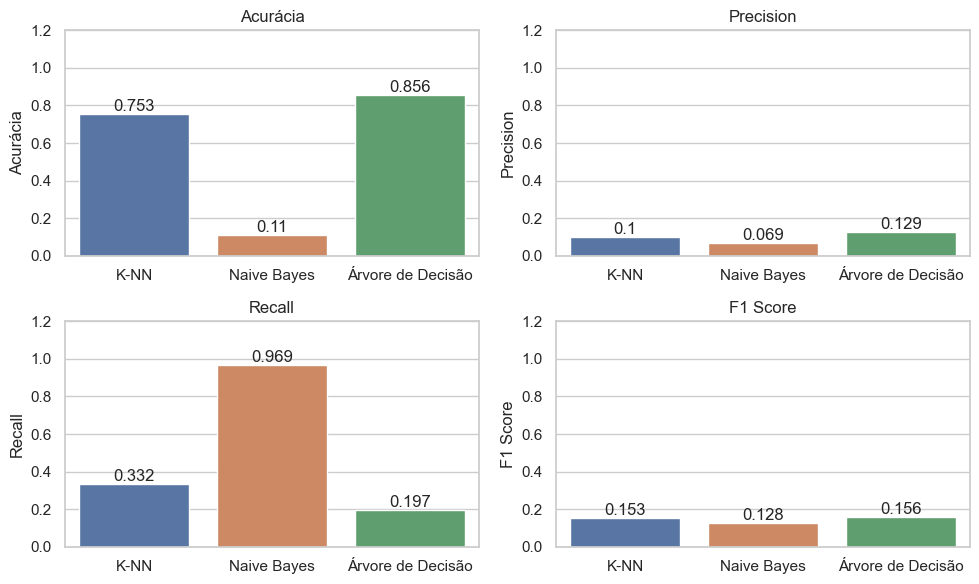

In [71]:
# Plotar gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

metrics = ['Acurácia', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    plt.subplot(2, 2, metrics.index(metric) + 1)
    sns.barplot(x='Modelo', y=metric, data=df_metrics)
    plt.title(metric)
    plt.ylim(0, 1.2)
    plt.xlabel('')
    plt.ylabel(metric)
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 04 - Conclusão

No geral, nenhum dos modelos apresentou um desempenho satisfatório em todas as métricas, o que sugere que ainda há espaço para melhorias nos modelos ou que a abordagem utilizada pode não ser a mais adequada para esse conjunto de dados. É importante considerar a possibilidade de explorar outras técnicas de modelagem, ajustar hiperparâmetros dos modelos ou tentar abordagens diferentes para lidar com o desequilíbrio entre as classes.